# Детектирование объектов. Часть 1.
Классификация и локализация

## Переключение версии TensorFlow

In [1]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
import random
import numpy as np
import skimage.filters
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import tensorflow as tf

'''
Пояснения к импортируемым модулям и пакетам:

1. import random
   - Модуль random содержит функции для генерации случайных чисел, выборок и случайных событий.
   - Пример использования: random.randint(a, b) возвращает случайное целое число в диапазоне от a до b включительно.
   - В компьютерном зрении и машинном обучении random часто используется для случайного перемешивания данных или выбора случайных параметров.

2. import numpy as np
   - Numpy — библиотека для работы с многомерными массивами и матрицами, а также для математических операций над ними.
   - np.array(...) создаёт массив, np.mean(...) вычисляет среднее, np.random... — генерация случайных чисел и т.п.
   - В компьютерном зрении изображения часто представлены как многомерные массивы (например, 2D или 3D массивы пикселей).

3. import skimage.filters
   - skimage (scikit-image) — библиотека для обработки изображений.
   - filters — модуль, который содержит функции для фильтрации изображений (например, размытие, выделение краёв).
   - Пример: skimage.filters.sobel(image) применит оператор Собеля для выделения границ.
   - Параметры функций фильтров зависят от типа фильтра (например, размер ядра размытия).

4. import matplotlib.pyplot as plt
   - Matplotlib — библиотека для визуализации данных.
   - pyplot — модуль, позволяющий строить графики и отображать изображения.
   - plt.imshow(image) отображает изображение.
   - plt.show() выводит окно с графиком или изображением.
   - Можно создавать графики, диаграммы, накладывать аннотации и многое другое.

5. import matplotlib.patches as patches
   - patches — модуль для добавления геометрических фигур на график.
   - Например, patches.Rectangle(...) создаёт прямоугольник, который можно отобразить поверх изображения для выделения объекта.
   - Параметры: координаты, ширина, высота, цвет, прозрачность и т.п.

6. import tensorflow as tf
   - TensorFlow — крупная библиотека для машинного обучения и нейронных сетей от Google.
   - tf — стандартное сокращение для TensorFlow.
   - Позволяет создавать, обучать и запускать нейросети.
   - Основные понятия: тензоры (многомерные массивы), граф вычислений, слои нейросети, оптимизаторы, функции потерь.
   - Используется для построения сложных моделей компьютерного зрения, например, классификации и сегментации изображений.

Итог:
- random и numpy помогают с генерацией данных и математикой.
- skimage.filters — базовая обработка изображений.
- matplotlib.pyplot и patches — для отображения изображений и графических примечаний.
- tensorflow — мощный инструмент для создания и обучения нейросетей, центральный для современных методов компьютерного зрения.
'''


'\nПояснения к импортируемым модулям и пакетам:\n\n1. import random\n   - Модуль random содержит функции для генерации случайных чисел, выборок и случайных событий.\n   - Пример использования: random.randint(a, b) возвращает случайное целое число в диапазоне от a до b включительно.\n   - В компьютерном зрении и машинном обучении random часто используется для случайного перемешивания данных или выбора случайных параметров.\n\n2. import numpy as np\n   - Numpy — библиотека для работы с многомерными массивами и матрицами, а также для математических операций над ними.\n   - np.array(...) создаёт массив, np.mean(...) вычисляет среднее, np.random... — генерация случайных чисел и т.п.\n   - В компьютерном зрении изображения часто представлены как многомерные массивы (например, 2D или 3D массивы пикселей).\n   \n3. import skimage.filters\n   - skimage (scikit-image) — библиотека для обработки изображений.\n   - filters — модуль, который содержит функции для фильтрации изображений (например, ра

## Загрузка и подготовка оригинального датасета MNIST

In [3]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

train_x = train_x.reshape(-1, 28, 28, 1).astype(np.float32) / 255.
test_x = test_x.reshape(-1, 28, 28, 1).astype(np.float32) / 255.

'''
Пояснения по строкам кода:

1. (train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()
   - Здесь происходит загрузка датасета MNIST из встроенной библиотеки TensorFlow Keras.
   - MNIST — набор из 70 000 изображений рукописных цифр (0-9).
   - train_x — массив обучающих изображений (числа в диапазоне 0-255).
   - train_y — метки (целые числа от 0 до 9), соответствующие каждому изображению.
   - test_x, test_y — аналогично, но для тестовой выборки.
   - Формат train_x и test_x до reshape — 2D массивы с размером (число изображений, 28, 28).

2. train_x.reshape(-1, 28, 28, 1)
   - Метод reshape меняет форму массива.
   - -1 означает «подобрать автоматически количество элементов по этой оси».
   - Добавляется 4-е измерение с размером 1 — это канал изображения (черно-белое — один канал).
   - В итоге размерность train_x становится (число изображений, 28 высота, 28 ширина, 1 канал).
   - Такая форма требуется для подачи в сверточные нейросети TensorFlow.

3. .astype(np.float32)
   - Преобразует данные в формат 32-битных чисел с плавающей точкой.
   - По умолчанию данные в MNIST — целочисленные (uint8).
   - Для нейросетей удобнее работать с float, так как параметры модели и вычисления обычно с плавающей точкой.

4. / 255.
   - Делит все значения пикселей на 255, нормализуя их в диапазон от 0 до 1.
   - Это важно для стабильного и быстрого обучения нейросети, так как значения входа не должны быть слишком большими.

Итог:
- Загрузили обучающую и тестовую выборку MNIST.
- Преобразовали каждое изображение в 28×28×1 массив с плавающими числами в диапазоне [0,1].
- Готовим данные для подачи в сверточную нейросеть TensorFlow.
'''


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


'\nПояснения по строкам кода:\n\n1. (train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()\n   - Здесь происходит загрузка датасета MNIST из встроенной библиотеки TensorFlow Keras.\n   - MNIST — набор из 70 000 изображений рукописных цифр (0-9).\n   - train_x — массив обучающих изображений (числа в диапазоне 0-255).\n   - train_y — метки (целые числа от 0 до 9), соответствующие каждому изображению.\n   - test_x, test_y — аналогично, но для тестовой выборки.\n   - Формат train_x и test_x до reshape — 2D массивы с размером (число изображений, 28, 28).\n\n2. train_x.reshape(-1, 28, 28, 1)\n   - Метод reshape меняет форму массива.\n   - -1 означает «подобрать автоматически количество элементов по этой оси».\n   - Добавляется 4-е измерение с размером 1 — это канал изображения (черно-белое — один канал).\n   - В итоге размерность train_x становится (число изображений, 28 высота, 28 ширина, 1 канал).\n   - Такая форма требуется для подачи в сверточные нейросети TensorFlow.

## Подготовка фона для новых изображений


'\nПояснения по каждой строке:\n\n1. bg_source = np.random.rand(1000, 1000, 1).astype(np.float32)\n   - np.random.rand(1000, 1000, 1) создаёт массив случайных чисел с плавающей точкой от 0 до 1.\n   - Размер массива: 1000×1000 пикселей, с 1 каналом (чёрно-белое изображение).\n   - .astype(np.float32) преобразует тип данных в 32-битный float для точности и совместимости с дальнейшей обработкой.\n\n2. bg_source = skimage.filters.gaussian(bg_source, 4)\n   - Применяется гауссово размытие (фильтр Гаусса) к изображению.\n   - Параметр 4 — стандартное отклонение (sigma) ядра размытия, чем больше — тем сильнее размытие.\n   - Размытие делает изображение более плавным, устраняя резкие шумы.\n\n3. bg_source = (bg_source - np.min(bg_source)) / (np.max(bg_source) - np.min(bg_source))\n   - Нормализация значений массива.\n   - Вычитаем минимальное значение, чтобы сдвинуть минимальный пиксель к 0.\n   - Делим на разницу max-min, чтобы максимальный пиксель стал равен 1.\n   - В итоге все значения в 

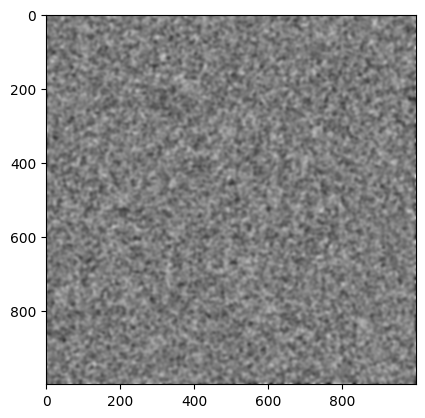

In [4]:
bg_source = np.random.rand(1000, 1000, 1).astype(np.float32)
bg_source = skimage.filters.gaussian(bg_source, 4)
bg_source = (bg_source - np.min(bg_source)) / (np.max(bg_source) - np.min(bg_source))
bg_source = np.clip(bg_source, 0, 1)

_=plt.imshow(bg_source[..., 0], 'gray')

'''
Пояснения по каждой строке:

1. bg_source = np.random.rand(1000, 1000, 1).astype(np.float32)
   - np.random.rand(1000, 1000, 1) создаёт массив случайных чисел с плавающей точкой от 0 до 1.
   - Размер массива: 1000×1000 пикселей, с 1 каналом (чёрно-белое изображение).
   - .astype(np.float32) преобразует тип данных в 32-битный float для точности и совместимости с дальнейшей обработкой.

2. bg_source = skimage.filters.gaussian(bg_source, 4)
   - Применяется гауссово размытие (фильтр Гаусса) к изображению.
   - Параметр 4 — стандартное отклонение (sigma) ядра размытия, чем больше — тем сильнее размытие.
   - Размытие делает изображение более плавным, устраняя резкие шумы.

3. bg_source = (bg_source - np.min(bg_source)) / (np.max(bg_source) - np.min(bg_source))
   - Нормализация значений массива.
   - Вычитаем минимальное значение, чтобы сдвинуть минимальный пиксель к 0.
   - Делим на разницу max-min, чтобы максимальный пиксель стал равен 1.
   - В итоге все значения в массиве будут в диапазоне [0, 1].

4. bg_source = np.clip(bg_source, 0, 1)
   - Обрезка значений массива, чтобы никакое значение не выходило за пределы от 0 до 1.
   - np.clip гарантирует, что все элементы будут не меньше 0 и не больше 1.
   - Это важно для правильного отображения и последующей обработки.

5. _=plt.imshow(bg_source[..., 0], 'gray')
   - Отображение изображения с помощью matplotlib.
   - bg_source[..., 0] — выбираем первый (и единственный) канал, так как изображение черно-белое.
   - 'gray' указывает, что изображение отображается в оттенках серого.
   - Префикс "_" для игнорирования результата функции plt.imshow(), это просто конвенция.

Итог:
- Создано случайное шумовое изображение.
- Применено размытие, чтобы сделать шум гладким.
- Нормализовано для диапазона 0–1.
- Отображено как черно-белое изображение.
'''


## Функция для конвертации MNIST в датасет для локализации

In [5]:
def convert_to_loc_ds(x, y, bg_source, new_size):
    x_new = np.zeros((x.shape[0], new_size[0], new_size[1], 1), dtype=np.float32)
    y_new = np.zeros((y.shape[0], 10, 5), dtype=np.float32)
    y_new[:, :, 1:] = -1

    rh = float(x.shape[1]) / new_size[0]
    rw = float(x.shape[2]) / new_size[1]

    for i in range(x.shape[0]):
        oh = random.randint(0, bg_source.shape[0] - new_size[0])
        ow = random.randint(0, bg_source.shape[1] - new_size[1])
        x_new[i] = bg_source[oh:oh+new_size[0], ow:ow+new_size[1], :]
        oh = random.randint(0, x_new[i,...].shape[0] - x[i].shape[0])
        ow = random.randint(0, x_new[i,...].shape[1] - x[i].shape[1])
        x_new[i, oh:oh+x[i].shape[0], ow:ow+x[i].shape[1], :] += x[i]
        x_new[i] = np.clip(x_new[i], 0, 1)
        ry = float(oh) / new_size[0]
        rx = float(ow) / new_size[1]
        y_new[i][y[i]] = [1.0, ry, rx, rh, rw]

    return x_new, y_new

'''
Пояснения к функции convert_to_loc_ds:

Функция предназначена для создания нового датасета изображений с фоном и метками,
которые указывают на расположение объектов (цифр) внутри изображения.

Аргументы функции:
- x — входные изображения (например, MNIST), форма (число изображений, высота, ширина, каналы)
- y — метки (целые числа 0-9), размер (число изображений,)
- bg_source — изображение фона (больше по размеру), на котором будут размещаться объекты из x
- new_size — кортеж (высота, ширина) нового размера выходных изображений

Внутри функции:

1. x_new = np.zeros((x.shape[0], new_size[0], new_size[1], 1), dtype=np.float32)
   - Создаётся пустой массив для новых изображений с размером new_size и одним каналом.
   - Изначально заполнен нулями (чёрный фон).

2. y_new = np.zeros((y.shape[0], 10, 5), dtype=np.float32)
   - Создаётся массив меток для каждого изображения.
   - Для каждого из y.shape[0] изображений — 10 возможных классов (цифр от 0 до 9).
   - Для каждого класса — 5 значений, которые будут хранить информацию о наличии и положении цифры.

3. y_new[:, :, 1:] = -1
   - Инициализируем все координаты и размеры объектов значением -1 (отсутствие объекта).

4. rh и rw — это коэффициенты масштабирования:
   - rh = исходная высота цифры / новая высота изображения
   - rw = исходная ширина цифры / новая ширина изображения
   - Используются для нормализации размеров цифры относительно нового изображения.

5. Цикл for по всем изображениям i:
   - oh, ow — случайные координаты верхнего левого угла области на фоне (bg_source), куда будет помещено новое изображение.
   - x_new[i] получает часть фона размером new_size, с координат (oh, ow).
   - Затем выбирается случайная позиция (oh, ow) внутри x_new[i], куда накладывается исходное изображение x[i].
   - Накладывание происходит сложением (+=), чтобы цифра появилась поверх фона.
   - np.clip ограничивает значения пикселей от 0 до 1, чтобы не выходить за допустимые пределы.
   - ry, rx — нормализованные координаты смещения цифры внутри нового изображения (от 0 до 1).
   - В y_new[i][y[i]] записывается массив из 5 элементов:
       - 1.0 — признак наличия цифры данного класса в изображении.
       - ry, rx — положение цифры по вертикали и горизонтали (нормализованные).
       - rh, rw — масштаб цифры относительно нового изображения.

6. return x_new, y_new
   - Возвращает новую пару:
     - x_new — изображения с фоном и наложенными цифрами.
     - y_new — метки с позициями и размерами цифр для обучения модели локализации.

Итог: функция создаёт датасет для задачи локализации объектов,
где цифры размещаются случайно на фоне, а метки содержат координаты и размеры цифр в новом изображении.
'''


'\nПояснения к функции convert_to_loc_ds:\n\nФункция предназначена для создания нового датасета изображений с фоном и метками,  \nкоторые указывают на расположение объектов (цифр) внутри изображения.\n\nАргументы функции:\n- x — входные изображения (например, MNIST), форма (число изображений, высота, ширина, каналы)\n- y — метки (целые числа 0-9), размер (число изображений,)\n- bg_source — изображение фона (больше по размеру), на котором будут размещаться объекты из x\n- new_size — кортеж (высота, ширина) нового размера выходных изображений\n\nВнутри функции:\n\n1. x_new = np.zeros((x.shape[0], new_size[0], new_size[1], 1), dtype=np.float32)\n   - Создаётся пустой массив для новых изображений с размером new_size и одним каналом.\n   - Изначально заполнен нулями (чёрный фон).\n\n2. y_new = np.zeros((y.shape[0], 10, 5), dtype=np.float32)\n   - Создаётся массив меток для каждого изображения.\n   - Для каждого из y.shape[0] изображений — 10 возможных классов (цифр от 0 до 9).\n   - Для каж

## Генерация локализационного датасета


In [6]:
new_size = (64, 64)

train_x_new, train_y_new = convert_to_loc_ds(train_x, train_y, bg_source, new_size)
test_x_new, test_y_new = convert_to_loc_ds(test_x, test_y, bg_source, new_size)

print(train_x_new.shape)
print(train_y_new.shape)
print(test_x_new.shape)
print(test_y_new.shape)

'''
Пояснения к коду:

1. new_size = (64, 64)
   - Устанавливаем новый размер изображений, которые мы хотим получить.
   - Здесь изображения будут 64 пикселя в высоту и 64 в ширину.

2. train_x_new, train_y_new = convert_to_loc_ds(train_x, train_y, bg_source, new_size)
   - Преобразуем обучающую выборку (train_x, train_y) с помощью функции convert_to_loc_ds.
   - На выходе получаем train_x_new — изображения размером 64×64 с фоном и цифрами,
     а также train_y_new — метки с положением и классом цифр.

3. test_x_new, test_y_new = convert_to_loc_ds(test_x, test_y, bg_source, new_size)
   - Аналогично преобразуем тестовую выборку.

4. print(train_x_new.shape)
   - Выводим размерность массива новых обучающих изображений.
   - Формат: (число изображений, 64, 64, 1), где 1 — количество каналов (ч/б).

5. print(train_y_new.shape)
   - Выводим размерность массива меток для обучающей выборки.
   - Формат: (число изображений, 10, 5), где 10 — количество классов (0-9), 5 — параметры метки (наличие, y, x, высота, ширина).

6. print(test_x_new.shape)
   - Выводим размер тестовых изображений после преобразования.

7. print(test_y_new.shape)
   - Выводим размер меток для тестовой выборки.

Итог:
- Получаем готовый к обучению датасет локализации цифр на фоне.
- Размеры и формат данных подготовлены для подачи в модель.
'''


(60000, 64, 64, 1)
(60000, 10, 5)
(10000, 64, 64, 1)
(10000, 10, 5)


'\nПояснения к коду:\n\n1. new_size = (64, 64)\n   - Устанавливаем новый размер изображений, которые мы хотим получить.\n   - Здесь изображения будут 64 пикселя в высоту и 64 в ширину.\n\n2. train_x_new, train_y_new = convert_to_loc_ds(train_x, train_y, bg_source, new_size)\n   - Преобразуем обучающую выборку (train_x, train_y) с помощью функции convert_to_loc_ds.\n   - На выходе получаем train_x_new — изображения размером 64×64 с фоном и цифрами,\n     а также train_y_new — метки с положением и классом цифр.\n\n3. test_x_new, test_y_new = convert_to_loc_ds(test_x, test_y, bg_source, new_size)\n   - Аналогично преобразуем тестовую выборку.\n\n4. print(train_x_new.shape)\n   - Выводим размерность массива новых обучающих изображений.\n   - Формат: (число изображений, 64, 64, 1), где 1 — количество каналов (ч/б).\n\n5. print(train_y_new.shape)\n   - Выводим размерность массива меток для обучающей выборки.\n   - Формат: (число изображений, 10, 5), где 10 — количество классов (0-9), 5 — пар

## Фнкция для визуализации локализации

In [7]:
def show_prediction(x, logits):
    pred_cls = np.argmax(logits[:,0])
    ry, rx, rh, rw = logits[pred_cls][1:]

    box_y = round(ry * x.shape[0])
    box_x = round(rx * x.shape[1])
    box_h = round(rh * x.shape[0])
    box_w = round(rw * x.shape[1])

    fig, ax = plt.subplots(1)
    ax.imshow(x[...,0], 'gray', vmin=0, vmax=1)
    rect = patches.Rectangle((box_x, box_y), box_w, box_h, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    print('Prediction: {}'.format(pred_cls))
    print('Box: {}'.format((box_x, box_y, box_w, box_h)))

'''
Пояснения по функции show_prediction:

Аргументы:
- x — изображение в формате (высота, ширина, каналы), с пикселями в диапазоне [0,1].
- logits — массив прогнозов модели для каждого класса, форма (10, 5).
  Каждый элемент — массив из 5 значений: [вероятность присутствия, ry, rx, rh, rw].

Шаги функции:

1. pred_cls = np.argmax(logits[:,0])
   - Находит индекс класса (от 0 до 9), у которого максимальное значение вероятности присутствия (логит в позиции [:,0]).
   - Это предсказанный класс цифры.

2. ry, rx, rh, rw = logits[pred_cls][1:]
   - Извлекает параметры расположения и размера для выбранного класса:
     ry — относительная вертикальная позиция (от 0 до 1) верхнего левого угла коробки.
     rx — относительная горизонтальная позиция.
     rh — относительная высота объекта.
     rw — относительная ширина объекта.

3. box_y = round(ry * x.shape[0])
   box_x = round(rx * x.shape[1])
   box_h = round(rh * x.shape[0])
   box_w = round(rw * x.shape[1])
   - Преобразует относительные координаты в пиксели, округляя до целых.
   - x.shape[0] — высота изображения, x.shape[1] — ширина.

4. fig, ax = plt.subplots(1)
   - Создаёт окно для графика с одной осью.

5. ax.imshow(x[...,0], 'gray', vmin=0, vmax=1)
   - Отображает чёрно-белое изображение (первый канал).
   - vmin и vmax устанавливают границы отображаемых значений (0 и 1).

6. rect = patches.Rectangle((box_x, box_y), box_w, box_h, linewidth=1, edgecolor='r', facecolor='none')
   - Создаёт красный прямоугольник без заливки с координатами (box_x, box_y) и размерами box_w × box_h.
   - linewidth=1 — толщина линии.

7. ax.add_patch(rect)
   - Добавляет прямоугольник на изображение.

8. print('Prediction: {}'.format(pred_cls))
   - Выводит предсказанный класс цифры.

9. print('Box: {}'.format((box_x, box_y, box_w, box_h)))
   - Выводит координаты и размеры прямоугольника вокруг найденного объекта.

Итог:
Функция визуализирует изображение с рамкой вокруг предсказанного объекта и выводит информацию о классе и положении.
'''


"\nПояснения по функции show_prediction:\n\nАргументы:\n- x — изображение в формате (высота, ширина, каналы), с пикселями в диапазоне [0,1].\n- logits — массив прогнозов модели для каждого класса, форма (10, 5).\n  Каждый элемент — массив из 5 значений: [вероятность присутствия, ry, rx, rh, rw].\n\nШаги функции:\n\n1. pred_cls = np.argmax(logits[:,0])\n   - Находит индекс класса (от 0 до 9), у которого максимальное значение вероятности присутствия (логит в позиции [:,0]).\n   - Это предсказанный класс цифры.\n\n2. ry, rx, rh, rw = logits[pred_cls][1:]\n   - Извлекает параметры расположения и размера для выбранного класса:\n     ry — относительная вертикальная позиция (от 0 до 1) верхнего левого угла коробки.\n     rx — относительная горизонтальная позиция.\n     rh — относительная высота объекта.\n     rw — относительная ширина объекта.\n\n3. box_y = round(ry * x.shape[0])\n   box_x = round(rx * x.shape[1])\n   box_h = round(rh * x.shape[0])\n   box_w = round(rw * x.shape[1])\n   - Пре

## Визуализация Ground-Truth образца

Prediction: 0
Box: (33, 22, 28, 28)


'\nПояснения к коду:\n\n1. i = random.randint(0, train_x_new.shape[0] - 1)\n   - Выбирает случайный индекс i от 0 до количества изображений в train_x_new минус 1.\n   - random.randint(a, b) возвращает случайное целое число из диапазона [a, b], включительно.\n   - Здесь важно вычесть 1, чтобы индекс не выходил за границы массива.\n\n2. show_prediction(train_x_new[i], train_y_new[i])\n   - Вызывает функцию show_prediction для выбранного случайного изображения train_x_new[i] и его меток train_y_new[i].\n   - Функция отобразит изображение с рамкой, которая показывает положение и класс цифры на изображении, а также выведет эти данные в консоль.\n\nИтог:\n- Этот код случайным образом выбирает изображение из преобразованного тренировочного набора и визуализирует предсказание модели (или метку).\n- Полезно для проверки и отладки данных и модели.\n'

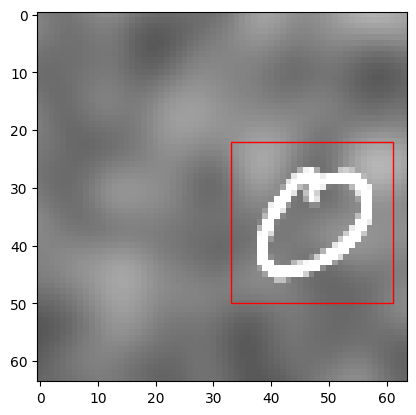

In [8]:
i = random.randint(0, train_x_new.shape[0] - 1)
show_prediction(train_x_new[i], train_y_new[i])

'''
Пояснения к коду:

1. i = random.randint(0, train_x_new.shape[0] - 1)
   - Выбирает случайный индекс i от 0 до количества изображений в train_x_new минус 1.
   - random.randint(a, b) возвращает случайное целое число из диапазона [a, b], включительно.
   - Здесь важно вычесть 1, чтобы индекс не выходил за границы массива.

2. show_prediction(train_x_new[i], train_y_new[i])
   - Вызывает функцию show_prediction для выбранного случайного изображения train_x_new[i] и его меток train_y_new[i].
   - Функция отобразит изображение с рамкой, которая показывает положение и класс цифры на изображении, а также выведет эти данные в консоль.

Итог:
- Этот код случайным образом выбирает изображение из преобразованного тренировочного набора и визуализирует предсказание модели (или метку).
- Полезно для проверки и отладки данных и модели.
'''


## Создание модели для классификации и локализации

In [9]:
class Model(tf.keras.Model):

    def __init__(self):
        super(Model, self).__init__()

        self.conv1 = tf.keras.layers.Conv2D(32, (5, 5), activation=tf.nn.relu, padding='same')
        self.conv2 = tf.keras.layers.Conv2D(64, (5, 5), activation=tf.nn.relu, padding='same')
        self.conv3 = tf.keras.layers.Conv2D(128, (5, 5), activation=tf.nn.relu, padding='same')
        self.conv4 = tf.keras.layers.Conv2D(128, (5, 5), activation=tf.nn.relu, padding='same')
        self.fc1 = tf.keras.layers.Dense(256, activation=tf.nn.relu)
        self.fc2 = tf.keras.layers.Dense(5*10, activation=None)
        self.max_pool = tf.keras.layers.MaxPooling2D((2, 2), (2, 2), padding='same')
        self.flatten = tf.keras.layers.Flatten()

    def call(self, inp):

        out = self.conv1(inp)
        out = self.max_pool(out)
        out = self.conv2(out)
        out = self.max_pool(out)
        out = self.conv3(out)
        out = self.max_pool(out)
        out = self.conv4(out)
        out = self.max_pool(out)
        out = self.flatten(out)
        out = self.fc1(out)
        out = self.fc2(out)
        out = tf.reshape(out, (-1, out.shape[1]//5, 5))

        return out

model = Model()

'''
Пояснения к классу Model:

1. class Model(tf.keras.Model):
   - Определение собственной модели нейросети, наследуемой от базового класса tf.keras.Model.
   - Позволяет создавать сложные модели с удобным интерфейсом TensorFlow.

2. def __init__(self):
   - Конструктор модели, где объявляются слои сети.

3. Слои сверточные (Conv2D):
   - self.conv1 = tf.keras.layers.Conv2D(32, (5, 5), activation=tf.nn.relu, padding='same')
     - 32 фильтра (ядра), размером 5×5.
     - Активация ReLU — нелинейная функция, которая пропускает положительные значения и обнуляет отрицательные.
     - padding='same' — сохраняет размерность входа (за счёт добавления отступов).
   - Аналогично conv2 с 64 фильтрами, conv3 и conv4 с 128 фильтрами.

4. MaxPooling2D:
   - self.max_pool = tf.keras.layers.MaxPooling2D((2, 2), (2, 2), padding='same')
   - Слой подвыборки, уменьшает размерность изображения вдвое (с шагом 2).
   - padding='same' сохраняет форму с добавлением отступов.
   - Уменьшение размерности помогает модели выделять более абстрактные признаки и уменьшать вычислительную нагрузку.

5. Flatten:
   - self.flatten = tf.keras.layers.Flatten()
   - Преобразует 3D-тензор (высота, ширина, каналы) в одномерный вектор, чтобы подать на полносвязные слои.

6. Полносвязные слои (Dense):
   - self.fc1 = tf.keras.layers.Dense(256, activation=tf.nn.relu)
     - 256 нейронов, с активацией ReLU.
   - self.fc2 = tf.keras.layers.Dense(5*10, activation=None)
     - Выходной слой без активации (линейный).
     - Выход размером 50 (5*10), где 10 — количество классов (цифр), 5 — количество параметров на класс (наличие + координаты).

7. def call(self, inp):
   - Определяет как данные проходят через сеть при вызове.
   - inp — входной тензор с изображением.
   - Последовательно применяются слои conv + max_pool.
   - Затем выходы сворачиваются в вектор.
   - Передаются через два полносвязных слоя.
   - На выходе reshape: из (batch_size, 50) в (batch_size, 10, 5),
     то есть для каждого из 10 классов 5 параметров (вероятность, координаты).

8. model = Model()
   - Создание экземпляра модели.

Итог:
- Это сверточная нейросеть для локализации и классификации 10 цифр на изображении.
- Выход модели — предсказания вероятности и параметров позиции для каждого класса.
'''


"\nПояснения к классу Model:\n\n1. class Model(tf.keras.Model):\n   - Определение собственной модели нейросети, наследуемой от базового класса tf.keras.Model.\n   - Позволяет создавать сложные модели с удобным интерфейсом TensorFlow.\n\n2. def __init__(self):\n   - Конструктор модели, где объявляются слои сети.\n\n3. Слои сверточные (Conv2D):\n   - self.conv1 = tf.keras.layers.Conv2D(32, (5, 5), activation=tf.nn.relu, padding='same')\n     - 32 фильтра (ядра), размером 5×5.\n     - Активация ReLU — нелинейная функция, которая пропускает положительные значения и обнуляет отрицательные.\n     - padding='same' — сохраняет размерность входа (за счёт добавления отступов).\n   - Аналогично conv2 с 64 фильтрами, conv3 и conv4 с 128 фильтрами.\n\n4. MaxPooling2D:\n   - self.max_pool = tf.keras.layers.MaxPooling2D((2, 2), (2, 2), padding='same')\n   - Слой подвыборки, уменьшает размерность изображения вдвое (с шагом 2).\n   - padding='same' сохраняет форму с добавлением отступов.\n   - Уменьшен

## Функция потерь (Loss)

In [10]:
def loss_cls(labels, logits):
    logits_cls = logits[:, :, 0]
    labels_cls = labels[:, :, 0]
    return tf.reduce_mean(tf.keras.losses.categorical_crossentropy(
        labels_cls, logits_cls, from_logits=True))

def loss_box(labels, logits):
    logits_box = logits[:, :, 1:]
    labels_box = labels[:, :, 1:]
    return tf.reduce_mean(tf.keras.losses.MSE(
        labels_box, logits_box))

LAMBDA = 10.0
def loss_composit(labels, logits):
    return loss_cls(labels, logits) + LAMBDA * loss_box(labels, logits)

'''
Пояснения к функциям потерь:

1. def loss_cls(labels, logits):
   - Вычисляет ошибку классификации.
   - labels и logits — тензоры формы (batch_size, 10, 5).
   - logits_cls = logits[:, :, 0] — вероятности наличия объекта для каждого из 10 классов.
   - labels_cls = labels[:, :, 0] — истинные метки наличия объекта (1 или 0).
   - tf.keras.losses.categorical_crossentropy — функция потерь кросс-энтропии для многоклассовой классификации.
     from_logits=True — входные данные logits, а не вероятности (будет применён softmax внутри).
   - tf.reduce_mean — усредняет потери по батчу и классам.

2. def loss_box(labels, logits):
   - Вычисляет ошибку локализации (позиции и размера бокса).
   - logits_box = logits[:, :, 1:] — предсказанные координаты и размеры (ry, rx, rh, rw).
   - labels_box = labels[:, :, 1:] — истинные координаты и размеры.
   - tf.keras.losses.MSE — среднеквадратичная ошибка (Mean Squared Error).
   - tf.reduce_mean — усредняет ошибку по всему батчу.

3. LAMBDA = 10.0
   - Весовой коэффициент, балансирующий вклад ошибки локализации.
   - Позволяет сильнее штрафовать ошибки в позиционировании объекта.

4. def loss_composit(labels, logits):
   - Составная функция потерь.
   - Суммирует ошибку классификации и взвешенную ошибку локализации.
   - Это позволяет одновременно обучать модель правильно классифицировать и точно локализовать объекты.

Итог:
- Эти функции используются для обучения модели, чтобы она училась не только правильно определять, есть ли цифра класса на изображении, но и где именно она находится.
- loss_composit — основная функция потерь для оптимизации модели.
'''


'\nПояснения к функциям потерь:\n\n1. def loss_cls(labels, logits):\n   - Вычисляет ошибку классификации.\n   - labels и logits — тензоры формы (batch_size, 10, 5).\n   - logits_cls = logits[:, :, 0] — вероятности наличия объекта для каждого из 10 классов.\n   - labels_cls = labels[:, :, 0] — истинные метки наличия объекта (1 или 0).\n   - tf.keras.losses.categorical_crossentropy — функция потерь кросс-энтропии для многоклассовой классификации.\n     from_logits=True — входные данные logits, а не вероятности (будет применён softmax внутри).\n   - tf.reduce_mean — усредняет потери по батчу и классам.\n\n2. def loss_box(labels, logits):\n   - Вычисляет ошибку локализации (позиции и размера бокса).\n   - logits_box = logits[:, :, 1:] — предсказанные координаты и размеры (ry, rx, rh, rw).\n   - labels_box = labels[:, :, 1:] — истинные координаты и размеры.\n   - tf.keras.losses.MSE — среднеквадратичная ошибка (Mean Squared Error).\n   - tf.reduce_mean — усредняет ошибку по всему батчу.\n\n

## Обучение модели

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 17ms/step - loss: 4.1287
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - loss: 0.4566
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - loss: 0.1571
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - loss: 0.0984
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - loss: 0.0718
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - loss: 0.0558
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - loss: 0.0459
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - loss: 0.0336
Epoch 9/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - loss: 0.0302
Epoch 10/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - loss: 0.0255
Epoch 11/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - loss: 0.0199
Epoch 12/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - loss: 0.0192
Epoch 13/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - loss: 0.0219
Epoch 14/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - loss: 0.0175
Epoch 15/20
938/938 ━━━━━━━━━

"\nПояснения к коду:\n\n1. NUM_EPOCHS = 20\n   - Количество эпох обучения модели.\n   - Одна эпоха — полный проход по всему обучающему датасету.\n\n2. BATCH_SIZE = 64\n   - Размер батча (пакета) — количество примеров, обрабатываемых одновременно за один шаг обновления весов.\n   - Обработка батчами помогает эффективнее использовать память и ускоряет обучение.\n\n3. model.compile(optimizer='adam', loss=loss_composit)\n   - Компиляция модели с указанием:\n     - оптимизатора 'adam' — адаптивный градиентный метод, популярный и эффективный.\n     - функции потерь loss_composit — составная функция для классификации и локализации.\n   - Компиляция подготавливает модель к обучению.\n\n4. hist = model.fit(train_x_new, train_y_new, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS)\n   - Запуск процесса обучения.\n   - train_x_new, train_y_new — входные данные и метки.\n   - batch_size — число примеров на один шаг обучения.\n   - epochs — количество проходов по всему датасету.\n   - Возвращает объект hi

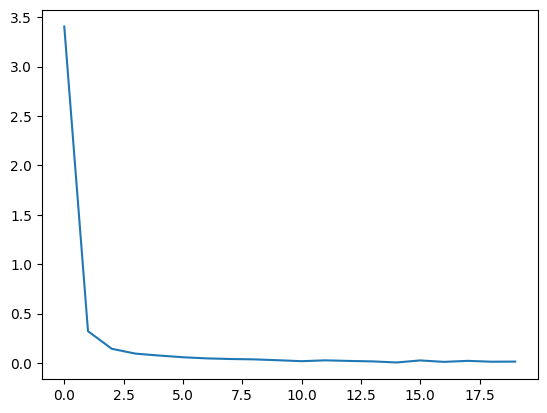

In [11]:
NUM_EPOCHS = 20
BATCH_SIZE = 64

model.compile(optimizer='adam', loss=loss_composit)

hist = model.fit(train_x_new, train_y_new, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS)

plt.plot(hist.history['loss'])

'''
Пояснения к коду:

1. NUM_EPOCHS = 20
   - Количество эпох обучения модели.
   - Одна эпоха — полный проход по всему обучающему датасету.

2. BATCH_SIZE = 64
   - Размер батча (пакета) — количество примеров, обрабатываемых одновременно за один шаг обновления весов.
   - Обработка батчами помогает эффективнее использовать память и ускоряет обучение.

3. model.compile(optimizer='adam', loss=loss_composit)
   - Компиляция модели с указанием:
     - оптимизатора 'adam' — адаптивный градиентный метод, популярный и эффективный.
     - функции потерь loss_composit — составная функция для классификации и локализации.
   - Компиляция подготавливает модель к обучению.

4. hist = model.fit(train_x_new, train_y_new, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS)
   - Запуск процесса обучения.
   - train_x_new, train_y_new — входные данные и метки.
   - batch_size — число примеров на один шаг обучения.
   - epochs — количество проходов по всему датасету.
   - Возвращает объект hist, содержащий историю обучения (значения потерь и метрик по эпохам).

5. plt.plot(hist.history['loss'])
   - Визуализация графика изменения функции потерь (loss) по эпохам.
   - Помогает оценить, как модель обучается — снижается ли ошибка.

Итог:
- Этот блок кода запускает обучение нейросети для задачи классификации и локализации цифр.
- Отображает график потерь для оценки качества обучения.
'''


## Тестирование модели

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 630ms/step
Prediction: 5
Box: (11, 4, 27, 27)


'\nПояснения к коду:\n\n1. i = random.randint(0, test_x_new.shape[0] - 1)\n   - Выбирает случайный индекс изображения из тестового набора.\n   - Диапазон от 0 до длина массива минус 1, чтобы избежать выхода за границы.\n\n2. sample = test_x_new[i]\n   - Извлекает выбранное изображение для предсказания.\n\n3. pred = model.predict(sample[None, ...])[0, ...]\n   - model.predict ожидает батч изображений, поэтому sample расширяется с помощью [None, ...], \n     добавляя ось для батча (размерность становится (1, height, width, channels)).\n   - predict возвращает массив предсказаний для батча, берем первый элемент [0, ...], т.к. батч из одного изображения.\n   - pred — массив прогнозов формы (10, 5) для 10 классов и 5 параметров.\n\n4. show_prediction(sample, pred)\n   - Вызывает функцию визуализации, которая отобразит изображение с рамкой вокруг предсказанного объекта.\n   - Также выводит предсказанный класс и координаты рамки.\n\nИтог:\n- Этот код случайным образом выбирает изображение из 

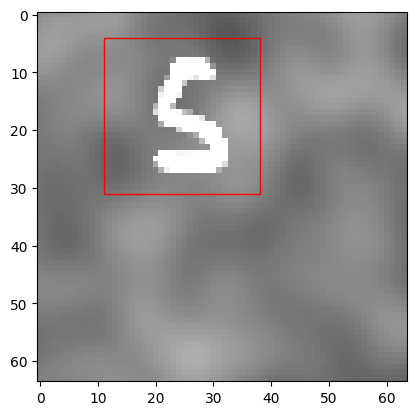

In [12]:
i = random.randint(0, test_x_new.shape[0] - 1)
sample = test_x_new[i]

pred = model.predict(sample[None, ...])[0, ...]
show_prediction(sample, pred)

'''
Пояснения к коду:

1. i = random.randint(0, test_x_new.shape[0] - 1)
   - Выбирает случайный индекс изображения из тестового набора.
   - Диапазон от 0 до длина массива минус 1, чтобы избежать выхода за границы.

2. sample = test_x_new[i]
   - Извлекает выбранное изображение для предсказания.

3. pred = model.predict(sample[None, ...])[0, ...]
   - model.predict ожидает батч изображений, поэтому sample расширяется с помощью [None, ...],
     добавляя ось для батча (размерность становится (1, height, width, channels)).
   - predict возвращает массив предсказаний для батча, берем первый элемент [0, ...], т.к. батч из одного изображения.
   - pred — массив прогнозов формы (10, 5) для 10 классов и 5 параметров.

4. show_prediction(sample, pred)
   - Вызывает функцию визуализации, которая отобразит изображение с рамкой вокруг предсказанного объекта.
   - Также выводит предсказанный класс и координаты рамки.

Итог:
- Этот код случайным образом выбирает изображение из тестовой выборки, выполняет предсказание модели и визуализирует результат.
- Позволяет оценить качество работы модели на новых данных.
'''
